## Data Preparation

In [ ]:
from google.colab import files
_ = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download 'paultimothymooney/chest-xray-pneumonia'

100% 2.29G/2.29G [00:11<00:00, 187MB/s]
100% 2.29G/2.29G [00:11<00:00, 218MB/s]


In [ ]:
!unzip -qq chest-xray-pneumonia.zip

In [ ]:
!ls ./chest_xray/train/NORMAL | wc -l

1341


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
train_dataset = image_dataset_from_directory(
    "chest_xray/train",
    image_size=(180, 180),
    batch_size=32,
    label_mode = 'binary')

valid_dataset = image_dataset_from_directory(
    "chest_xray/val",
    image_size=(180, 180),
    batch_size=8,
    label_mode = 'binary')

test_dataset = image_dataset_from_directory(
    "chest_xray/test",
    image_size=(180, 180),
    batch_size=32,
    label_mode = 'binary')

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


(32, 180, 180, 3)
(32, 1)


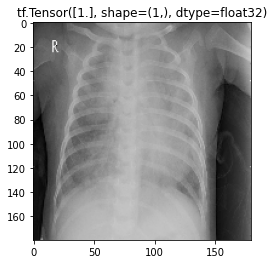

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for item in train_dataset:
  print(item[0].shape)
  print(item[1].shape)

  input_shape = item[0][0].shape

  img = np.array(item[0][0], dtype='int32')
  plt.imshow(img)
  plt.title(str(item[1][0]))
  plt.show()

  break

In [ ]:
input_shape

TensorShape([180, 180, 3])

## Model Design

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, Input
from tensorflow.keras import regularizers

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
model.trainable = False

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
model_full = Sequential(
    [
        model,
        layers.GlobalAvgPool2D(),
        layers.Dense(50, activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model_full.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

## Training

In [ ]:
history = model_full.fit(train_dataset,
            epochs = 30,
            validation_data=test_dataset)

Epoch 1/30
 23/163 [===>..........................] - ETA: 22:34 - loss: 0.9782 - accuracy: 0.7649

KeyboardInterrupt: ignored

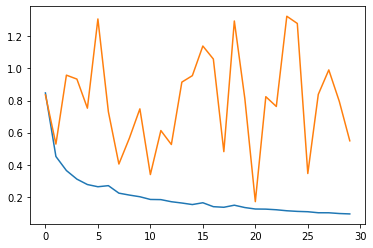

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])